In [1]:
import os
os.chdir('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy.interpolate import make_interp_spline

In [2]:
path_deeplabv3plus = 'result/validation_metric/metrics_deeplabv3plus.csv'
path_deepwatermapv2 = 'result/validation_metric/metrics_deepwatermapv2.csv'
path_watnet = 'result/validation_metric/metrics_watnet.csv'
## read metric file
deeplabv3_plus = pd.read_csv(path_deeplabv3plus)
deepwatermapv2 = pd.read_csv(path_deepwatermapv2)
watnet = pd.read_csv(path_watnet)
## insert epoch column
deeplabv3_plus.insert(0, 'epoch', np.arange(len(deeplabv3_plus['val_miou'])))
deepwatermapv2.insert(0, 'epoch', np.arange(len(watnet['val_miou'])))
watnet.insert(0, 'epoch', np.arange(len(watnet['val_miou'])))
watnet.head()


,epoch,val_miou,val_loss
0,0,0.385299,0.540297
1,1,0.217576,0.972282
2,2,0.360796,0.758776
3,3,0.385299,0.638410
4,4,0.385299,0.579422


In [3]:
def smooth(x, window_len=31):
    _head = np.full(shape=int((window_len-1)/2), fill_value=x[0])
    _tail = np.full(shape=int((window_len-1)/2), fill_value=x[-1])
    s = np.r_[_head, x, _tail]
    w = np.ones(window_len,'d')
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y


In [4]:
# metric = 'val_loss'
metric = 'val_miou'
window = 81
## ----- deeplabv3_plus ----
### smooth 
deeplabv3_plus[metric+'_smooth'] = smooth(deeplabv3_plus[metric].to_numpy(),window_len=window) 
### interpolate;
x_y_spline = make_interp_spline(deeplabv3_plus['epoch'], deeplabv3_plus[metric+'_smooth'])
x_new_d = np.linspace(deeplabv3_plus['epoch'].min(), deeplabv3_plus['epoch'].max(), 20)
y_new_d = x_y_spline(x_new_d)

## ----- deepwatermapv2 ----
### smooth 
deepwatermapv2[metric+'_smooth'] = smooth(deepwatermapv2[metric].to_numpy(),window_len=window) 
### interpolate;
x_y_spline = make_interp_spline(deepwatermapv2['epoch'], deepwatermapv2[metric+'_smooth'])
x_new_dw = np.linspace(deepwatermapv2['epoch'].min(), deepwatermapv2['epoch'].max(), 20)
y_new_dw = x_y_spline(x_new_dw)


## ----- watnet ----
### smooth 
watnet[metric+'_smooth'] = smooth(watnet[metric].to_numpy(),window_len=window) 
### interpolate
x_y_spline = make_interp_spline(watnet['epoch'], watnet[metric+'_smooth'])
x_new_w = np.linspace(watnet['epoch'].min(), watnet['epoch'].max(), 20)
y_new_w = x_y_spline(x_new_w)

Text(0, 0.5, 'MIoU')

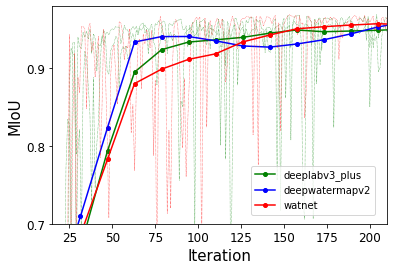

In [5]:
plt.figure(figsize=(6, 4))
### ------ deeplabv3_plus ------
plt.plot(deeplabv3_plus['epoch'], \
            deeplabv3_plus[metric], \
            color='g',linestyle='dotted', \
            linewidth = 0.5)
plt.plot(x_new_d, y_new_d, color='g',\
            linewidth = 1.5, marker='o', \
            markerfacecolor='g', markersize=4, \
            label='deeplabv3_plus')

### ------ deepwatermapv2 ------
plt.plot(deepwatermapv2['epoch'], \
            deepwatermapv2[metric], \
            color='g',linestyle='dotted', \
            linewidth = 0.5)
plt.plot(x_new_dw, y_new_dw, color='b',\
            linewidth = 1.5, marker='o', \
            markerfacecolor='b', markersize=4, \
            label='deepwatermapv2')
            
### ------ watnet ------
plt.plot(watnet['epoch'], \
            watnet[metric], \
            color='r',linestyle='dotted', \
            linewidth = 0.5)
plt.plot(x_new_w, y_new_w, color='r',\
            linewidth = 1.5, marker='o', \
            markerfacecolor='r', markersize=4, \
            label='watnet')

### figure setting
plt.legend(prop = {'size':10}, loc= 'best', bbox_to_anchor=(0.58,0.29))
ax=plt.gca()
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
plt.tick_params(labelsize=12)
plt.ylim([0.7, 0.98])
plt.xlim([15, 210])
plt.xlabel('Iteration',fontsize=15) 
plt.ylabel('MIoU',fontsize=15)
